In [2]:
import xgi
import hypercontagion as hc
import matplotlib.pyplot as plt
import time
import numpy as np
import random
import networkx as nx
from IPython.display import HTML

In [3]:
n = 100
is_connected = False
while not is_connected:
    H = xgi.random_hypergraph(n, [0.03, 0.0002, 0.00001])
    is_connected = xgi.is_connected(H)
pos = xgi.barycenter_spring_layout(H)

In [4]:
gamma = 0.05
beta2 = 0.1
beta3 = 0.05
beta4 = 0.01
tau = {1: 0, 2: beta2, 3: beta3, 4: beta4}
rho = 0.1

In [6]:
transition_events = hc.discrete_SIR(H, tau, gamma, tmin=0, tmax=40, dt=1, rho=rho, return_event_data=True)

In [7]:
pos = xgi.pairwise_spring_layout(H)

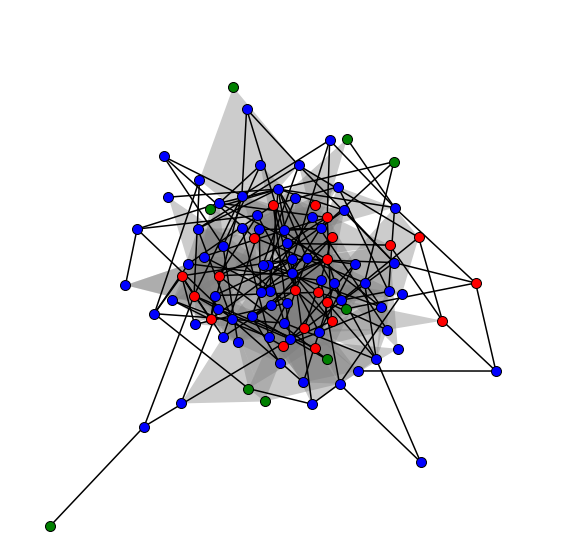

In [8]:
node_colors = {"S": "green", "I": "red", "R": "blue"}
edge_colors = {"S": "green", "I": "red", "R": "blue", "OFF": "grey"}
fps = 1
fig = plt.figure(figsize=(10, 10))
animation = hc.contagion_animation(fig, H, transition_events, pos, node_colors, edge_colors, fps=fps)
HTML(animation.to_jshtml())